**<h2>Importing Libraries</h2>**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams.update({'font.size': 18})

<p align ="justify">We consider the nonlinear system of ODEs  as <br>
 &emsp; &emsp; &emsp; &emsp; &emsp;dx/dt = x(α1- β1x - γ1y)<br>
 &emsp; &emsp; &emsp; &emsp; &emsp;dy/dt = y(α2- β2x - γ2y)<br>
Where α1,α2, β1, β2, γ1, γ2 >0 .
<br/><br/>

We can change this nonlinear system to a linear system making a change of variables with u=  β1x and v = γ2y . Thus the system becomes<br>
 &emsp; &emsp; &emsp; &emsp; &emsp;u′ = u (α1- u - (γ1 /γ2) v) <br>
 &emsp; &emsp; &emsp; &emsp; &emsp;v′ = v(α2- (β2/β1) u-v)

<br/><br/>
If  γ=  γ1 /γ2  and β = β2/β1 then the system of equations becomes a linear system and we can easily apply the linearization techniques. 
<br/><br/>

We can find the equilibria by looking at where u′= v′ =0.

Now, when u′=0     :    u=0 and u =  α1 - γv <br>
        &emsp; &emsp;  when v′=0     :    v=0 and  v=  α2 - βu
         <br/><br/>

For simplicity ,<br>
 &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;L1 : u=0<br>
&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;L2 : u =  α1 - γv <br>
&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;L3:  v=0<br>
&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;L4:  v=  α2 - βu <br></p>

**<h2>Defining Non linear system</h2>**<br>
dx/dt = x(α1- β1x - γ1y)<br>
dy/dt = y(α2- β2x - γ2y)


In [ ]:
def Sys(X ,alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma,t=0):
    return np.array([X[0]*(alpha1-beta1*X[0]-gamma1*X[1]), X[1]*(alpha2-beta2*X[0]-gamma2*X[1])])

**<h2>Finding equilibrium points</h2>**<br>
P1 (0,0)<br>P2 ( α1,0)<br> P3 (0,α2 ) and<br> P4 (
 $\frac {α1 - γα2 }{ 1-βγ}$,
 $\frac {α2 - βα1}{ 1-βγ}$)<br>
  P4 is the intersection point of L2 and L4.<br>  Let assume for simplicity c1 = α1 - γα2 and c2= α2 - βα1

In [ ]:
def equilibrium_points(alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma):
  point1 = (0,0)
  point2=(alpha1,0)
  point3= (0,alpha2)
  if (beta*gamma) ==1:
    return [point1,point2,point3]
  point4_x= (alpha1-gamma*alpha2)/(1-beta*gamma)
  point4_y= (alpha2-beta*alpha1)/(1-beta*gamma)
  point4=(point4_x,point4_y)
  return [point1,point2,point3,point4]

**<h2>Helper Functin to plot line</h2>**<br>
L2 : u =  α1 - γv <br>
L4:  v=  α2 - βu


In [ ]:
def plot_lines(x,alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma):
  y1= (alpha1-x)/gamma
  y2= alpha2-beta*x
  return [y1,y2]

**<h2>Finding Eigen values for equilibrium points and also decide type of equilibrium point</h2>**

In [ ]:
def Jacobian_Matrix(eq_pnts,alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma):
  for i in range(len(eq_pnts)):
      point = eq_pnts[i]
      A=[[alpha1-2*point[0]-gamma*point[1],-gamma*point[0]],[-beta*point[1],alpha2-beta*point[0]-2*point[1]]]
      # create numpy 2d-array
      m = np.array(A)

      print("A matrix:\n",m)

      # finding eigenvalues and eigenvectors
      w, v = np.linalg.eig(m)
      print("Equilibrium point:",point)
      print("Eigen Values: \n",w)

      #source
      if w[0]>0 and w[1]>0:
        print("It is a source")

      #sink
      elif w[0]<0 and w[1]<0:
        print("It is a sink")

      #saddle point
      elif (w[0]>0 and w[1]<0) or (w[0]<0 and w[1]>0):
        print("It is a saddle point")
      else:
        print("can't conclude")
        
      
      print("---------")
      print("\n\n")


**<h2>Drawing phase portraits</h2>**

In [ ]:
def plot_phase_portrait(x_range1,x_range2,y_range1,y_range2,alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma,title):
  fig2 = plt.figure(figsize=(8,6))
  ax4 = fig2.add_subplot(1,1,1)

  x = np.linspace(x_range1,x_range2,10)
  y = np.arange(y_range1,y_range2,10)

  y1,y2=plot_lines(x,alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma)
  plt.plot(x, y1, '-r')
  plt.plot(x, y2,'-g')

  #calculating equilibrium points 
  eq_pnts = equilibrium_points(alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma)


  # plot equilibrium points
  for point in eq_pnts:
      ax4.plot(point[0],point[1],"green", marker = "o", markersize = 10.0)

  # plotting co ordinate of equilibrium points
  x_points=[]
  y_points=[]
  for point in eq_pnts:
    x_points.append(point[0])
    y_points.append(point[1])
    
  for i_x, i_y in zip(x_points, y_points):
    plt.text(i_x, i_y, '({}, {})'.format(round(i_x,3),round(i_y,3)))
  
  #set title of the plot
  ax4.set_title(title)

  # quiverplot
  # define a grid and compute direction at each point
  x = np.linspace(x_range1,x_range2, 20)
  y = np.linspace(y_range1,y_range2, 20)

  X1 , Y1  = np.meshgrid(x, y)                                                                       # create a grid
  DX1, DY1 = Sys([X1, Y1],alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma)                        # compute growth rate on the grid
  M = (np.hypot(DX1, DY1))                                                                           # norm growth rate 
  M[ M == 0] = 1.                                                                                    # avoid zero division errors 
  DX1 /= M                                                                                           # normalize each arrows
  DY1 /= M

  #streamplot
  ax4.streamplot(X1,Y1,DX1,DY1, density = 0.4, linewidth=1.5,arrowstyle='fancy')
  ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
  ax4.grid()

  #calculating Jacobian matrix
  Jacobian_Matrix(eq_pnts,alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma)

 <ul type="disc">
 <li>
 <h2><b>βγ < 1 and c1 and c2 both positive</h2></li>


In [ ]:
alpha1 =1.5
alpha2=2
gamma1= 0.5
gamma2=1
beta2=0.75
beta1=1
gamma = gamma1/gamma2
beta= beta2/beta1

A matrix:
 [[ 1.5 -0. ]
 [-0.   2. ]]
Equilibrium point: (0, 0)
Eigen Values: 
 [1.5 2. ]
It is a source
---------



A matrix:
 [[-1.5   -0.75 ]
 [-0.     0.875]]
Equilibrium point: (1.5, 0)
Eigen Values: 
 [-1.5    0.875]
It is a saddle point
---------



A matrix:
 [[ 0.5 -0. ]
 [-1.5 -2. ]]
Equilibrium point: (0, 2)
Eigen Values: 
 [-2.   0.5]
It is a saddle point
---------



A matrix:
 [[-0.8  -0.4 ]
 [-1.05 -1.4 ]]
Equilibrium point: (0.8, 1.4)
Eigen Values: 
 [-0.38585716 -1.81414284]
It is a sink
---------





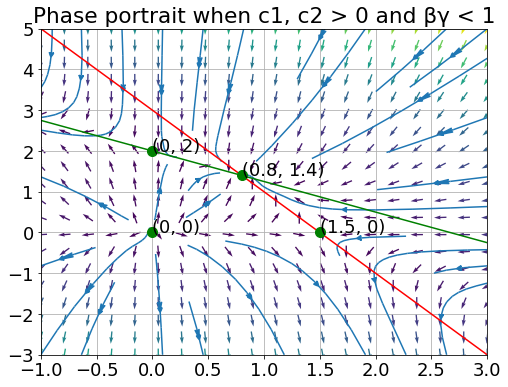

In [ ]:
title = "Phase portrait when c1, c2 > 0 and βγ < 1"
plot_phase_portrait(-1,3,-3,5,alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma,title)


  <ul type="disc">
 <li>
 <h2><b>βγ < 1 and c1 < 0 and 0< c2</h2></li>


In [ ]:
alpha1 =0.5
alpha2=2
gamma1= 0.5
gamma2=1
beta2=1
beta1=1
gamma = gamma1/gamma2
beta= beta2/beta1

A matrix:
 [[ 0.5 -0. ]
 [-0.   2. ]]
Equilibrium point: (0, 0)
Eigen Values: 
 [0.5 2. ]
It is a source
---------



A matrix:
 [[-0.5  -0.25]
 [-0.    1.5 ]]
Equilibrium point: (0.5, 0)
Eigen Values: 
 [-0.5  1.5]
It is a saddle point
---------



A matrix:
 [[-0.5 -0. ]
 [-2.  -2. ]]
Equilibrium point: (0, 2)
Eigen Values: 
 [-2.  -0.5]
It is a sink
---------



A matrix:
 [[ 1.   0.5]
 [-3.  -3. ]]
Equilibrium point: (-1.0, 3.0)
Eigen Values: 
 [ 0.58113883 -2.58113883]
It is a saddle point
---------





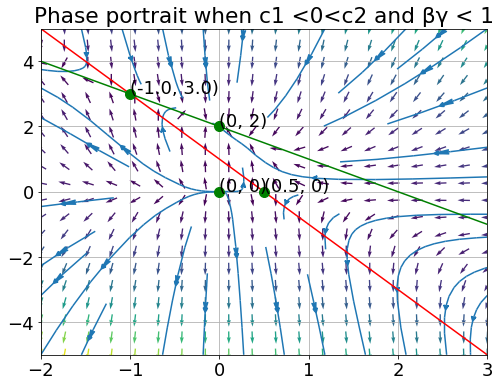

In [ ]:
title = "Phase portrait when c1 <0<c2 and βγ < 1"
plot_phase_portrait(-2,3,-5,5,alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma,title)


  <ul type="disc">
 <li>
<h2> <b>βγ < 1 and c1 > 0 >c2</h2></li>


In [ ]:
alpha1 =1
alpha2=0.6
gamma1= 1
gamma2=1
beta2=0.8
beta1=1
gamma = gamma1/gamma2
beta= beta2/beta1

A matrix:
 [[ 1.  -0. ]
 [-0.   0.6]]
Equilibrium point: (0, 0)
Eigen Values: 
 [1.  0.6]
It is a source
---------



A matrix:
 [[-1.  -1. ]
 [-0.  -0.2]]
Equilibrium point: (1, 0)
Eigen Values: 
 [-1.  -0.2]
It is a sink
---------



A matrix:
 [[ 0.4  -0.  ]
 [-0.48 -0.6 ]]
Equilibrium point: (0, 0.6)
Eigen Values: 
 [-0.6  0.4]
It is a saddle point
---------



A matrix:
 [[-2.  -2. ]
 [ 0.8  1. ]]
Equilibrium point: (2.0000000000000004, -1.0000000000000007)
Eigen Values: 
 [-1.30622577  0.30622577]
It is a saddle point
---------





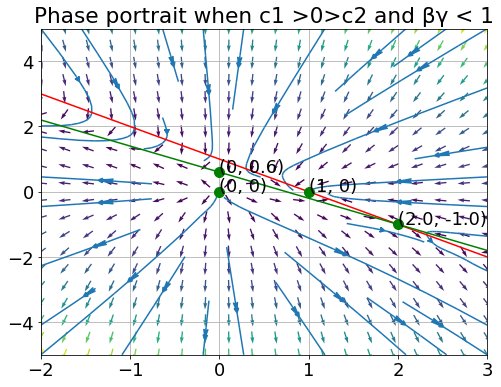

In [ ]:
title = "Phase portrait when c1 >0>c2 and βγ < 1"
plot_phase_portrait(-2,3,-5,5,alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma,title)


  <ul type="disc">
 <li>
 <h2><b>βγ >1 and c1<0 and 0< c2</h2></li>


In [ ]:
alpha1 =0.1
alpha2=2.1
gamma1= 1
gamma2=2
beta2=8
beta1=2
gamma = gamma1/gamma2
beta= beta2/beta1

A matrix:
 [[ 0.1 -0. ]
 [-0.   2.1]]
Equilibrium point: (0, 0)
Eigen Values: 
 [0.1 2.1]
It is a source
---------



A matrix:
 [[-0.1  -0.05]
 [-0.    1.7 ]]
Equilibrium point: (0.1, 0)
Eigen Values: 
 [-0.1  1.7]
It is a saddle point
---------



A matrix:
 [[-0.95 -0.  ]
 [-8.4  -2.1 ]]
Equilibrium point: (0, 2.1)
Eigen Values: 
 [-2.1  -0.95]
It is a sink
---------



A matrix:
 [[-0.95  -0.475]
 [ 6.8    1.7  ]]
Equilibrium point: (0.9500000000000001, -1.7000000000000002)
Eigen Values: 
 [0.375+1.21423844j 0.375-1.21423844j]
It is a source
---------





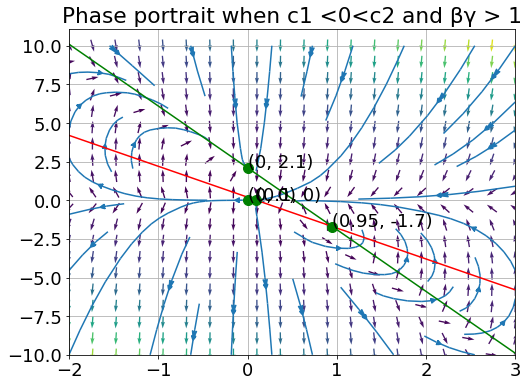

In [ ]:
title = "Phase portrait when c1 <0<c2 and βγ > 1"
plot_phase_portrait(-2,3,-10,10,alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma,title)


 
  <ul type="disc">
 <li>
 <h2><b>L2||L4 and βγ= 1 and β != α1/α2</h2></li>


In [ ]:
alpha1 =5
alpha2=1   
gamma1= 2
gamma2=1
beta2=1   
beta1=2
gamma = gamma1/gamma2
beta= beta2/beta1

A matrix:
 [[ 5. -0.]
 [-0.  1.]]
Equilibrium point: (0, 0)
Eigen Values: 
 [5. 1.]
It is a source
---------



A matrix:
 [[ -5.  -10. ]
 [ -0.   -1.5]]
Equilibrium point: (5, 0)
Eigen Values: 
 [-5.  -1.5]
It is a sink
---------



A matrix:
 [[ 3.  -0. ]
 [-0.5 -1. ]]
Equilibrium point: (0, 1)
Eigen Values: 
 [-1.  3.]
It is a saddle point
---------





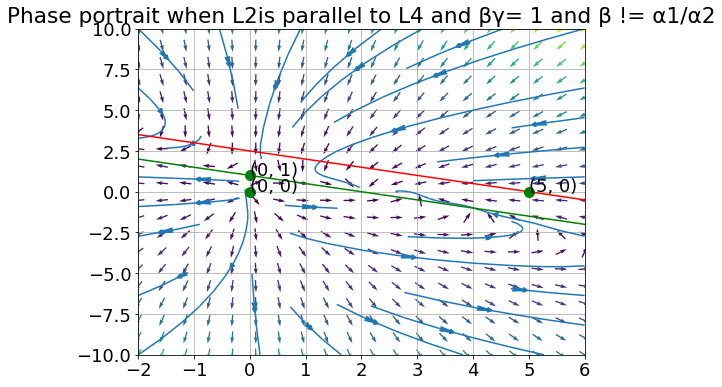

In [ ]:
title = "Phase portrait when L2is parallel to L4 and βγ= 1 and β != α1/α2"
plot_phase_portrait(-2,6,-10,10,alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma,title)


  <ul type="disc">
 <li>
<h2> <b>L2 coincides with L4 and βγ= 1 and β= α1/α2</h2></li>





In [ ]:
alpha1 =2
alpha2=2  
gamma1= 2
gamma2=2
beta2=2  
beta1=2
gamma = gamma1/gamma2
beta= beta2/beta1

A matrix:
 [[ 2. -0.]
 [-0.  2.]]
Equilibrium point: (0, 0)
Eigen Values: 
 [2. 2.]
It is a source
---------



A matrix:
 [[-2. -2.]
 [-0.  0.]]
Equilibrium point: (2, 0)
Eigen Values: 
 [-2.  0.]
can't conclude
---------



A matrix:
 [[ 0. -0.]
 [-2. -2.]]
Equilibrium point: (0, 2)
Eigen Values: 
 [-2.  0.]
can't conclude
---------





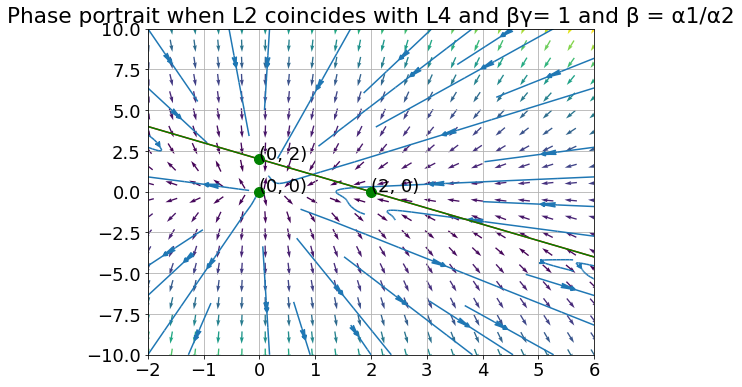

In [ ]:
title = "Phase portrait when L2 coincides with L4 and βγ= 1 and β = α1/α2"
plot_phase_portrait(-2,6,-10,10,alpha1,alpha2,gamma1,gamma2,beta1,beta2,beta,gamma,title)